In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Problem Statement

### Develop a machine learning model to predict the likelihood of loan approval for a given set of applicants based on historical data. The Dataset includes various features such as loan id, no of dependents, education, self employed, annual income, loan amount, loan term, cibil score, residential assets value, commercial assets value, luxury assets value and bank asset value.The goal is to create a reliable predictive model that can assist in automating the loan approval process, helping financial institutions make informed decisions while minimizing the risk of default.



### The Aim of this project is to build robust maching learning model that can predict the liklihood of loan approval for applicants,thereby assiting financial institutions in making informed and efficient decisions during the loan approval process 
     

In [111]:
## Data Types
## Shape,Columns names, Size
## Null Values
## Duplicate Values
## Outliers
## Plots plotting
## Correlation between features and Target varibles
## to seen Insights and patters of the data 


## Problem and Solution
##   1)Missing data  -Inputation
##   2)Outliers --It can skew your analysis
##   3)Data Quality issues -- inconsitent data formet,mislabeled categories
##   4)data distribution-- Understanding the distribution of your data is important for selecting features.
##   5)Feature Enginnering--Deciding which feature can include your model.
##   6)Multicollinearity--EDA will reveal high corrleations between features.
##   7)Data Scaling and Normalization
##   8)Dimensionality reducation - If more number of feature can diffcult to visualize.pca must
##   9)Handling categorical data --Bar plots and One hot encoding will help to solve the issue
##  10)Time_series data 
##  11)Bias data


In [112]:
df=pd.read_csv("loan_approval_dataset.csv")

In [113]:
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [114]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [115]:
df.columns=df.columns.str.replace(' ','')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [117]:
df.shape

(4269, 13)

In [118]:
df.education.value_counts()

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

In [119]:
df.self_employed.value_counts()

 Yes    2150
 No     2119
Name: self_employed, dtype: int64

In [120]:
df.duplicated().sum()

0

In [121]:
df.isnull().sum()/len(df)*100

loan_id                     0.0
no_of_dependents            0.0
education                   0.0
self_employed               0.0
income_annum                0.0
loan_amount                 0.0
loan_term                   0.0
cibil_score                 0.0
residential_assets_value    0.0
commercial_assets_value     0.0
luxury_assets_value         0.0
bank_asset_value            0.0
loan_status                 0.0
dtype: float64

In [122]:
## Outcome the data

# 1. There is no null values and dulpicated values in the data
# 2. self_employed,Education,loan_status are categorical columns.
# 3. 4269 rows and 13 columns are there (13-features)
# 4. Loan Approved-51% rejected-49% -- Balanced data
# 5.  Other colums are numerical

# Encoding and Checking Outliers

In [123]:
df.drop('loan_id',axis=1,inplace=True)

In [124]:
df.head(5)

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

In [125]:
df['self_employed']=df['self_employed'].astype('category')
df['self_employed']=df['self_employed'].cat.codes


In [126]:
df['education']=df['education'].astype('category')
df['education']=df['education'].cat.codes


In [127]:
df.head(5)

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   
2                 3          0              0       9100000     29700000   
3                 3          0              0       8200000     30700000   
4                 5          1              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

# Analysis of data

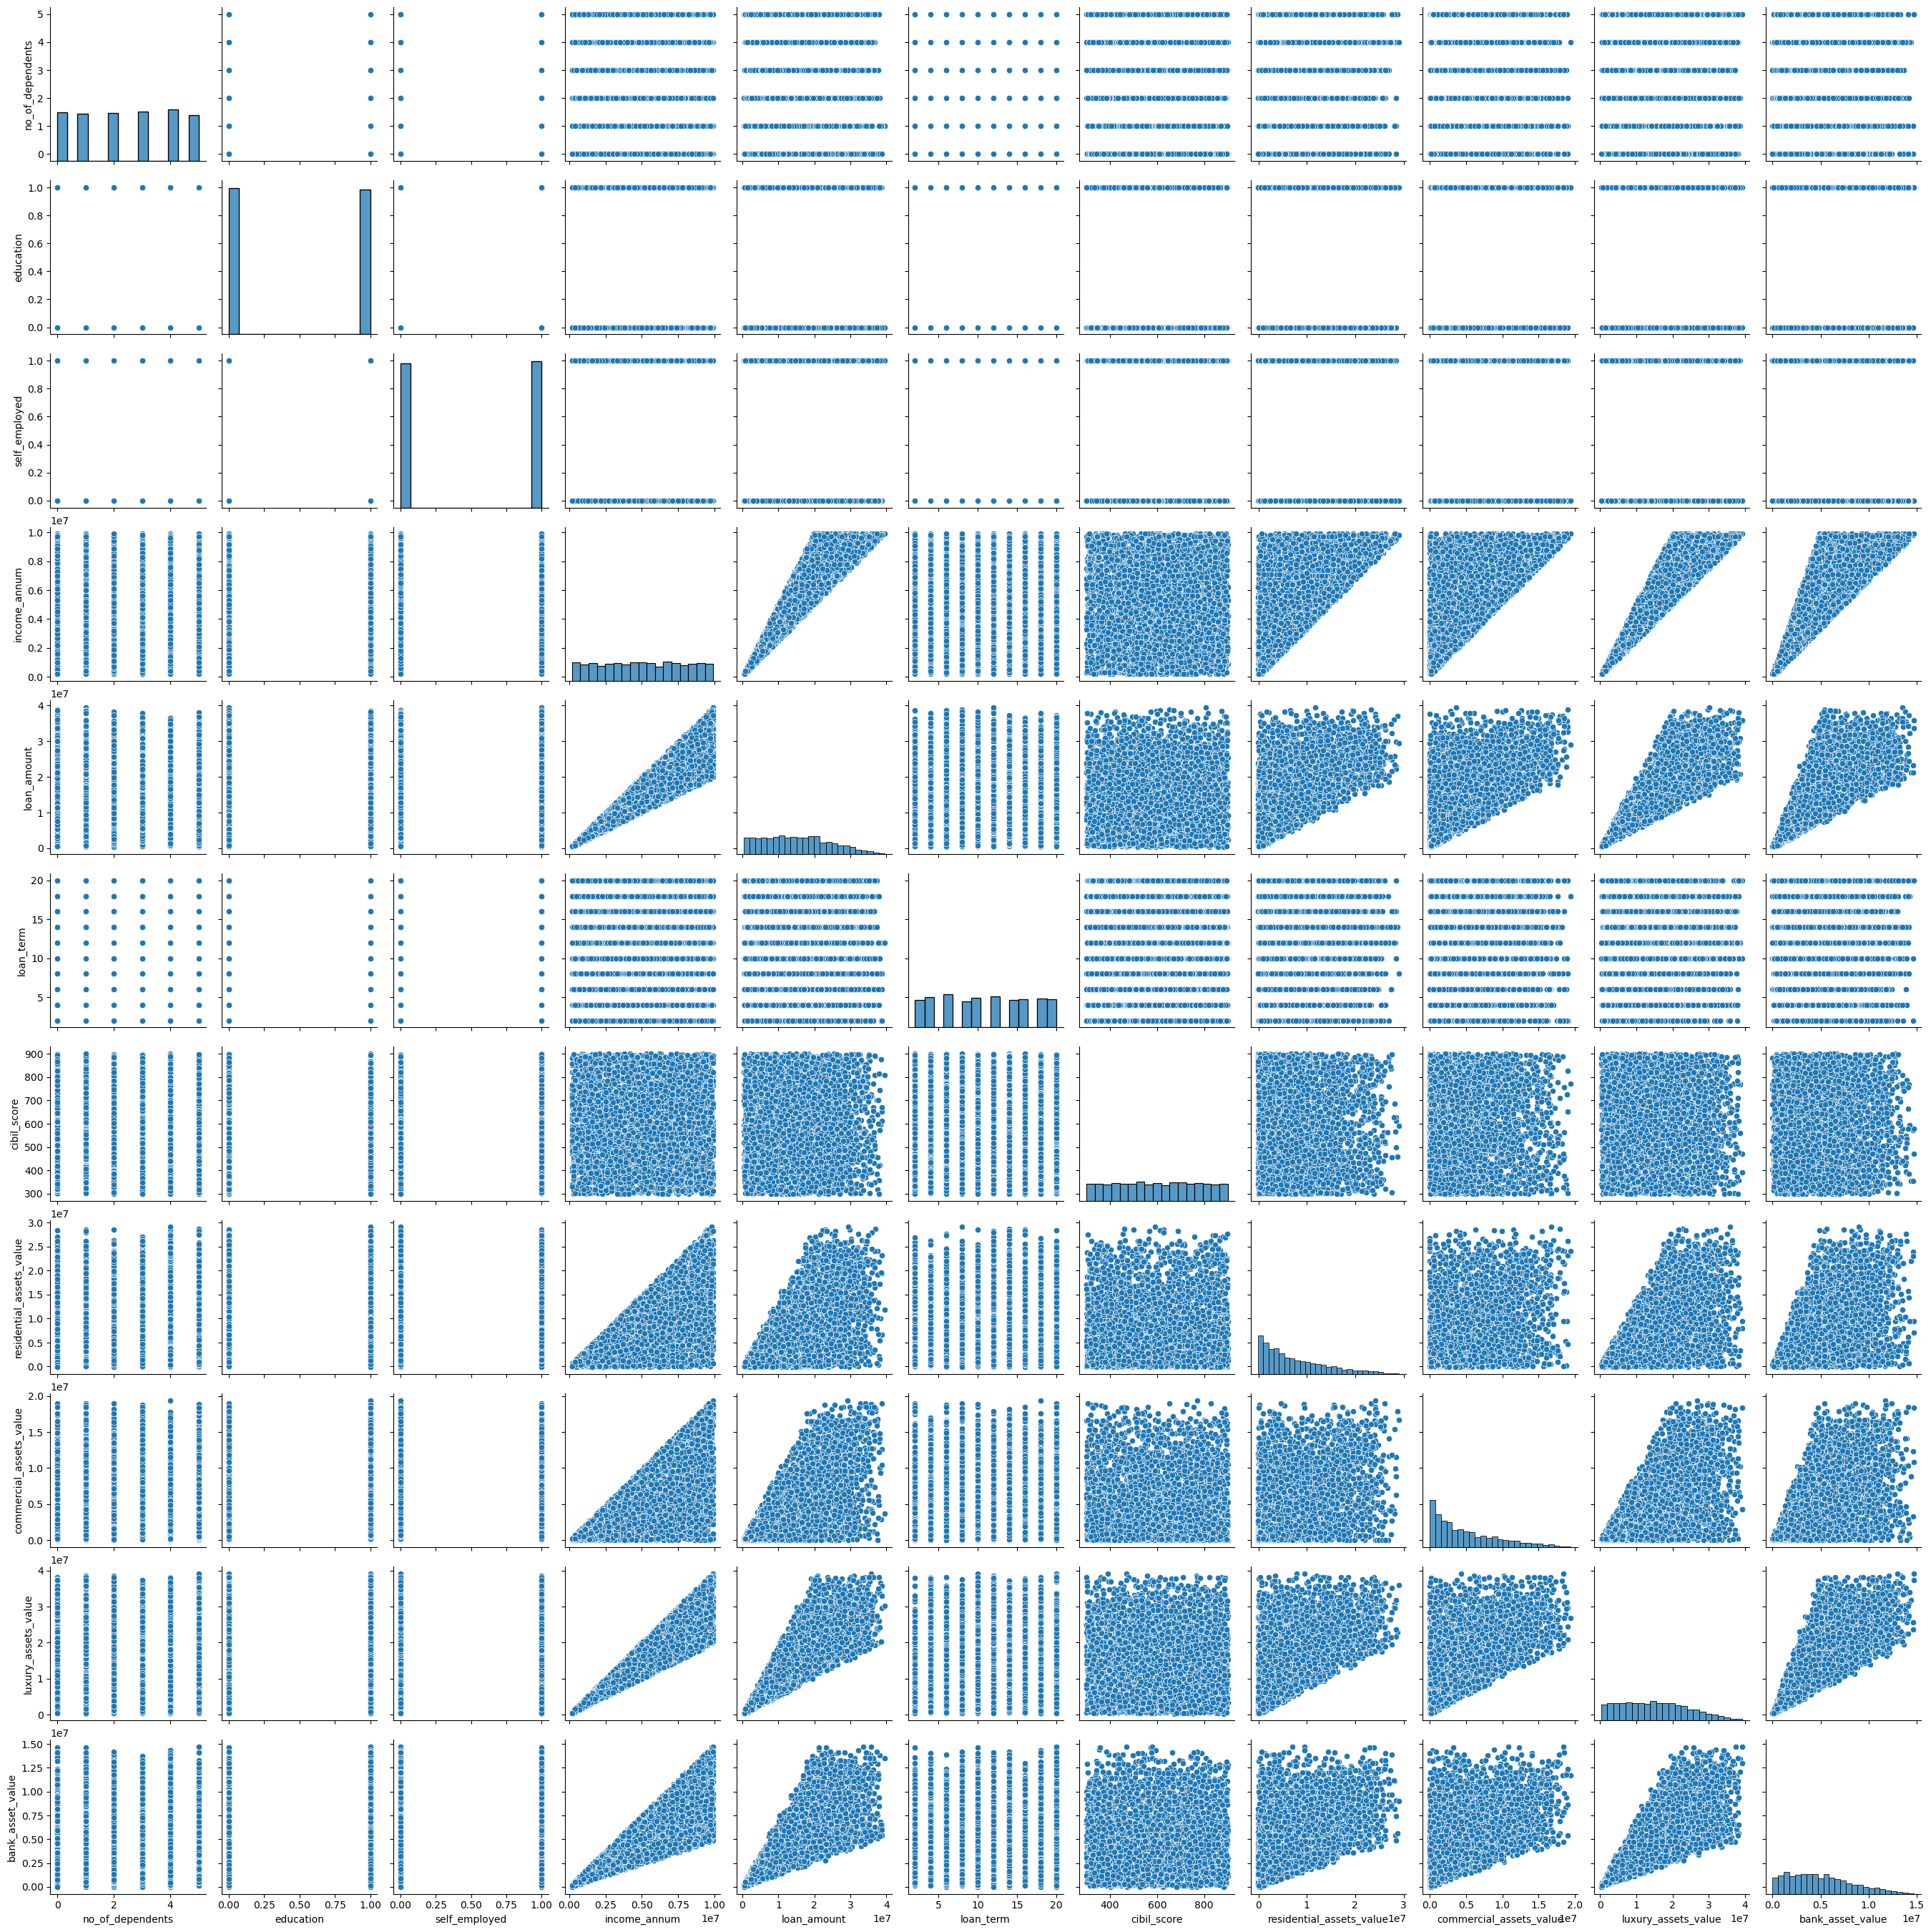

In [128]:
sns.pairplot(df)

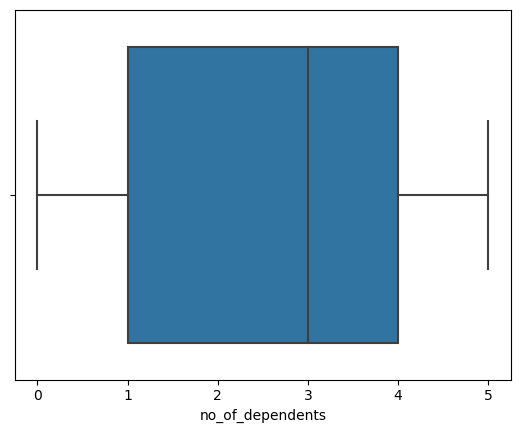

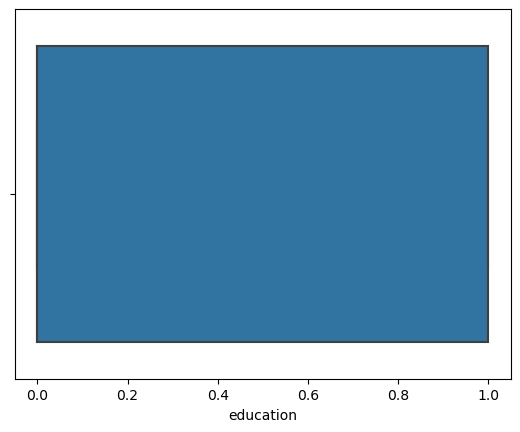

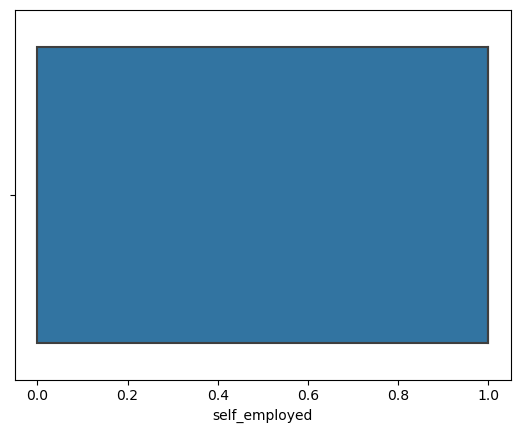

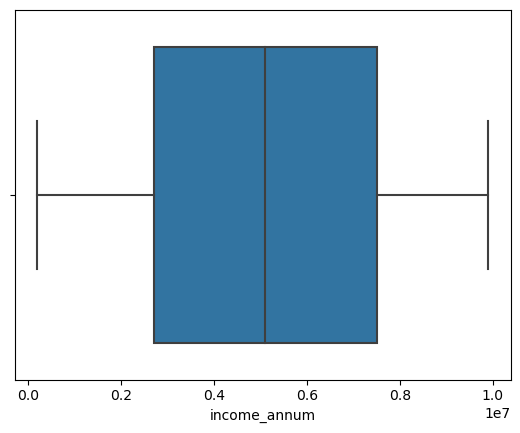

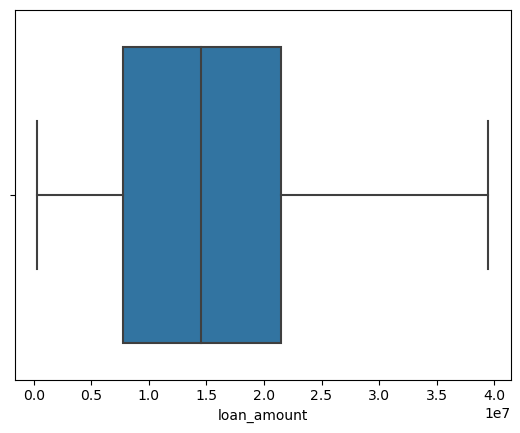

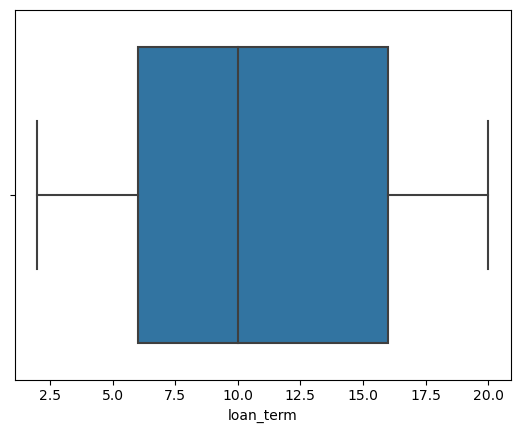

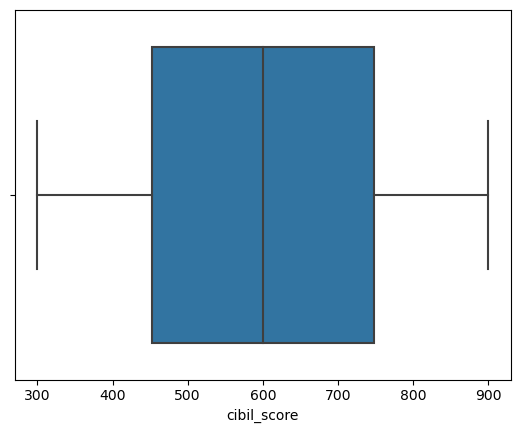

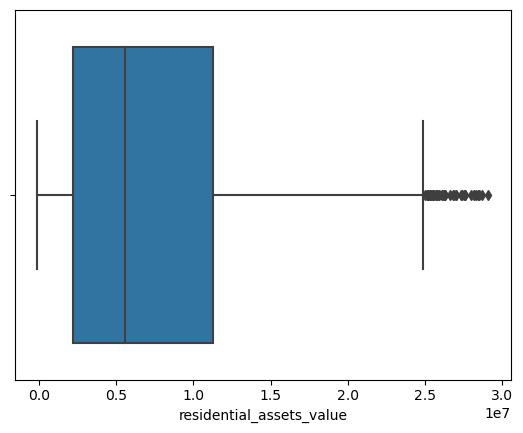

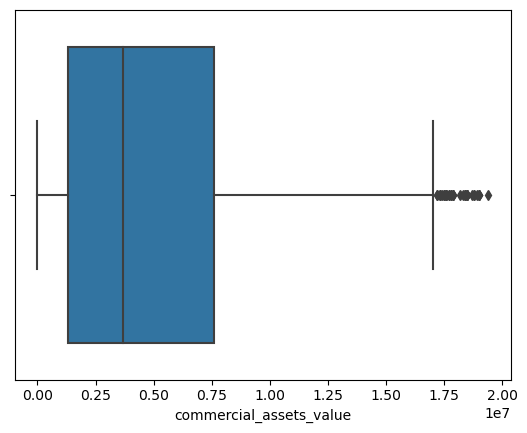

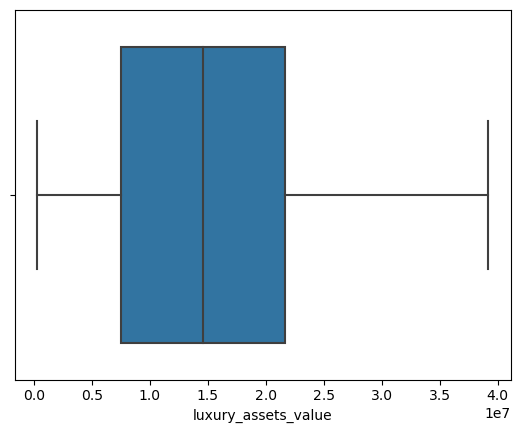

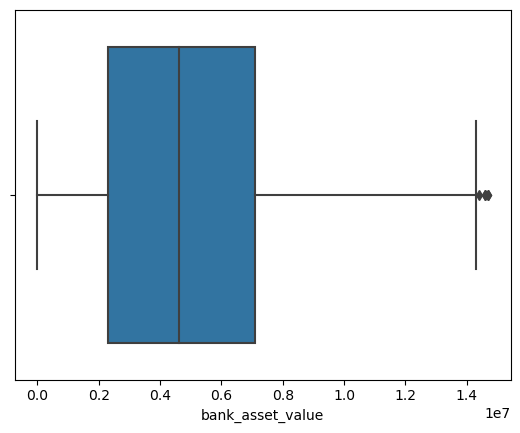

In [129]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=['object']).columns[0:]):
    boxplots(i)

In [130]:
# There some variable high correlated with other variables--1) Loanamount& income_annum 2)income_annum & luxury_assets_value
# 3)luxury_assets_value & bank_asset_value

## 1. loan amount

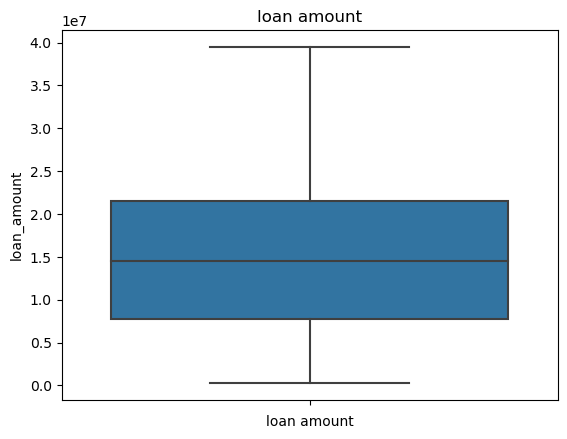

In [131]:
sns.boxplot(y='loan_amount',data=df)
plt.title("loan amount")
plt.xlabel("loan amount")
plt.show()

## 2. Does loan status relate to the loan amount 

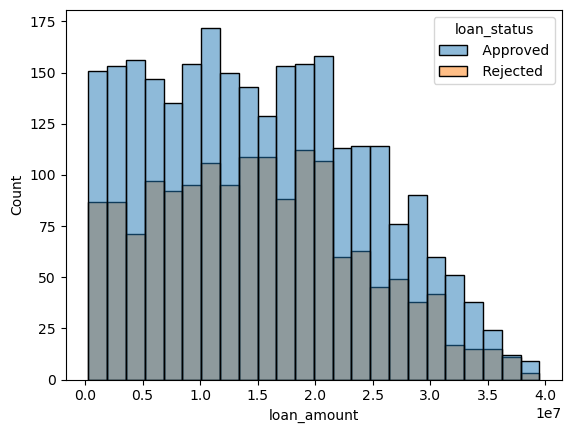

In [132]:
sns.histplot(x='loan_amount',hue='loan_status',data=df)
plt.show()

### In above histogram, we can see there are same trends for both approved and rejected loans for some different loan amounts, we haven't seen a strong relationship between the loan status and the loan amount in the histogram.

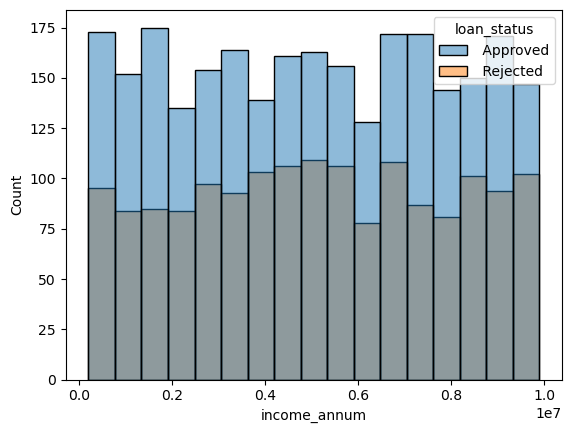

In [133]:
sns.histplot(x='income_annum',hue='loan_status',data=df,color='red')
plt.show()

In [134]:
df.head(2)

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected

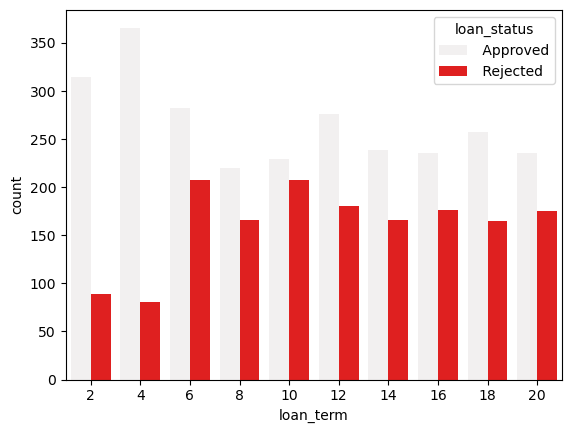

In [135]:
sns.countplot(x='loan_term',hue='loan_status',data=df,color='red')
plt.show()

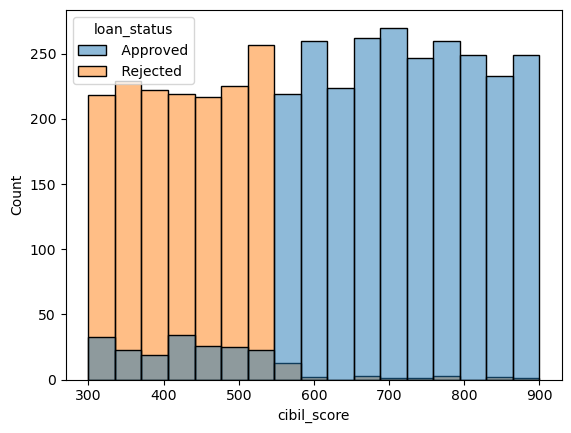

In [136]:
sns.histplot(x='cibil_score',hue='loan_status',data=df,color='red')

plt.show()

## Cibil_score is the main reason to approve and reject the loans
### According to Equifax, the standard of the credit scores are:
### 300-579: Poor.
### 580-669: Fair.
### 670-739: Good.
### 740-799: Very good.

In [137]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [138]:
x=df.loc[(df['cibil_score'] >550) & (df['loan_status']==' Rejected')].sort_values(['cibil_score'],ascending=False)

In [139]:
x.head(20)

no_of_dependents  education  self_employed  income_annum  loan_amount  \
559                  2          0              1        200000       500000   
3527                 0          0              0       1800000      6900000   
911                  0          0              1       1300000      4800000   
3213                 1          1              1       4300000     16300000   
236                  3          0              1        900000      3500000   
4099                 3          0              0       8700000     31100000   
1446                 1          0              0        300000      1200000   
67                   0          1              1       2700000     10100000   
3180                 4          0              0       3200000     12200000   
2856                 3          1              1       8300000     31400000   
348                  0          1              0       2000000      7000000   
1950                 0          0              1        200000       700000   
395                  2          0              1        800000      3200000   

      loan_term  cibil_score  residential_assets_value  \
559           6          885                   -100000   
3527         10          853                    900000   
911           4          835                    500000   
3213         14          792                    400000   
236           4          770                    700000   
4099         16          760                    400000   
1446         18          747                    100000   
67           20          693                    200000   
3180         14          683                   -100000   
2856          6          674                   1000000   
348           6          666                         0   
1950         10          587                   -100000   
395          10          584                         0   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
559                         0               300000            200000   
3527                   400000              3700000           1700000   
911                    100000              3300000            800000   
3213                   400000             10200000           4000000   
236                         0              2000000            600000   
4099                  1800000             19300000           4800000   
1446                        0               700000            200000   
67                    1700000              5900000           1400000   
3180                  1100000              7500000           2900000   
2856                  1600000             17200000           6100000   
348                   1200000              4300000           1400000   
1950                   100000               500000            100000   
395                    200000              2100000            700000   

     loan_status  
559     Rejected  
3527    Rejected  
911     Rejected  
3213    Rejected  
236     Rejected  
4099    Rejected  
1446    Rejected  
67      Rejected  
3180    Rejected  
2856    Rejected  
348     Rejected  
1950    Rejected  
395     Rejected

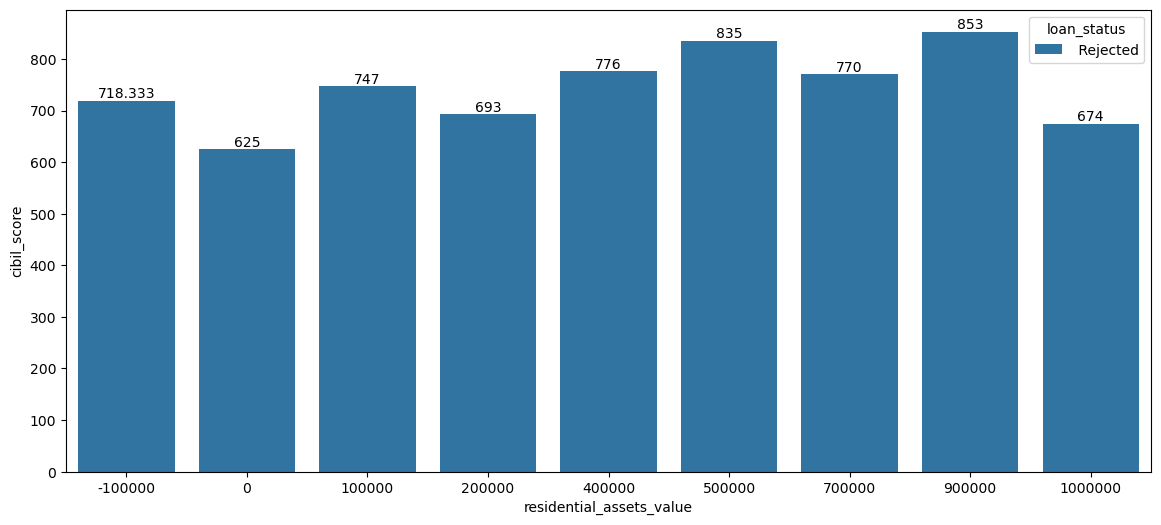

In [140]:
plt.figure(figsize=(14,6),dpi=100)
ax=sns.barplot(y='cibil_score',x='residential_assets_value',hue='loan_status',data=x,ci=False)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

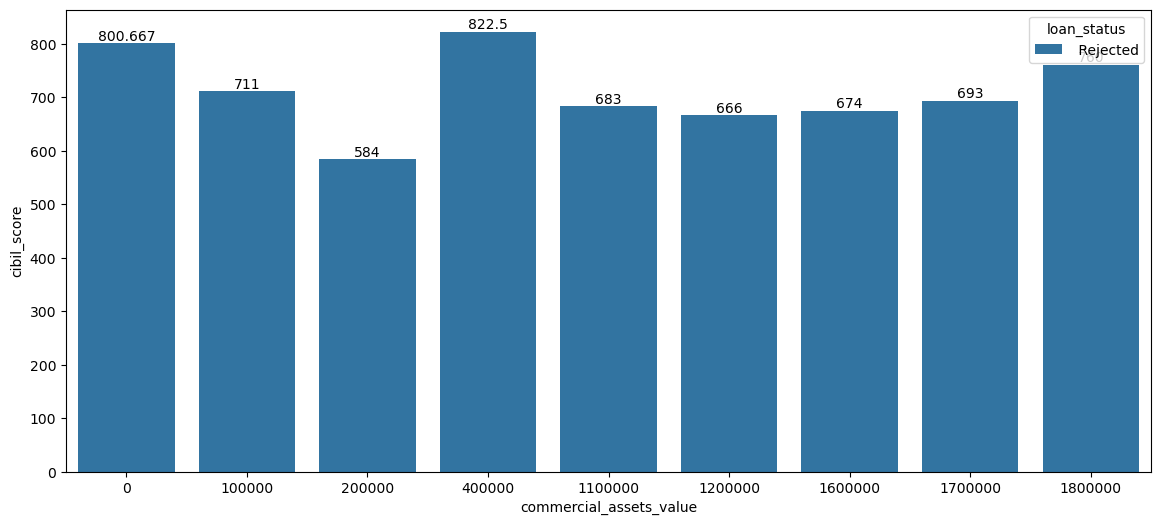

In [141]:
plt.figure(figsize=(14,6),dpi=100)
ax=sns.barplot(y='cibil_score',x='commercial_assets_value',hue='loan_status',data=x,ci=False)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

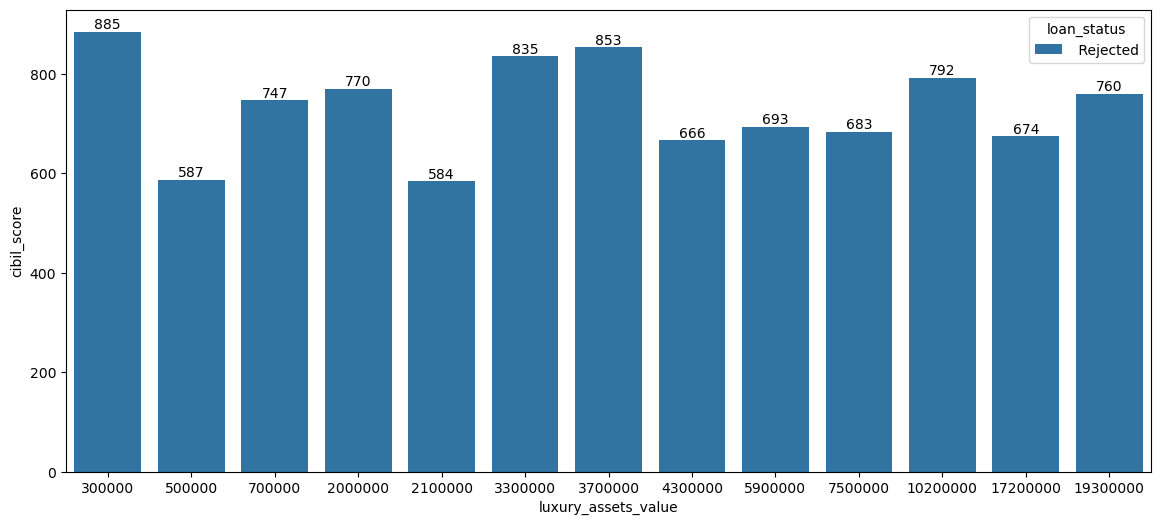

In [142]:
plt.figure(figsize=(14,6),dpi=100)
ax=sns.barplot(y='cibil_score',x='luxury_assets_value',hue='loan_status',data=x,ci=False)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

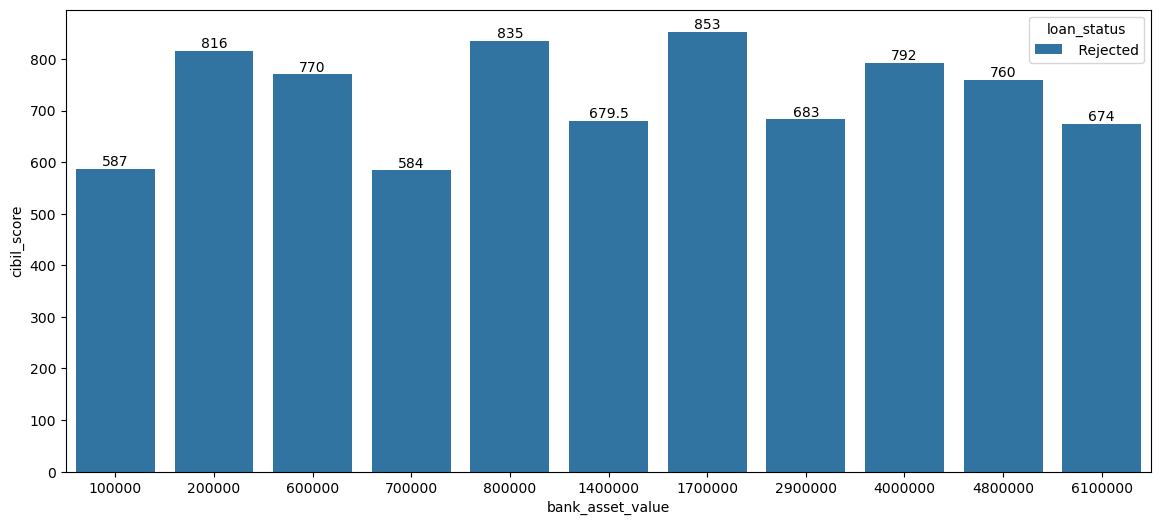

In [143]:
plt.figure(figsize=(14,6),dpi=100)
ax=sns.barplot(y='cibil_score',x='bank_asset_value',hue='loan_status',data=x,ci=False)
for i in ax.containers:
    ax.bar_label(i)
plt.show()


##  we are not able to see the clear trends between those asset values and the loan status. so let's find the correlation scores between those 4 asset values and other variables by following heatmap.

# Correlation by Heatmap

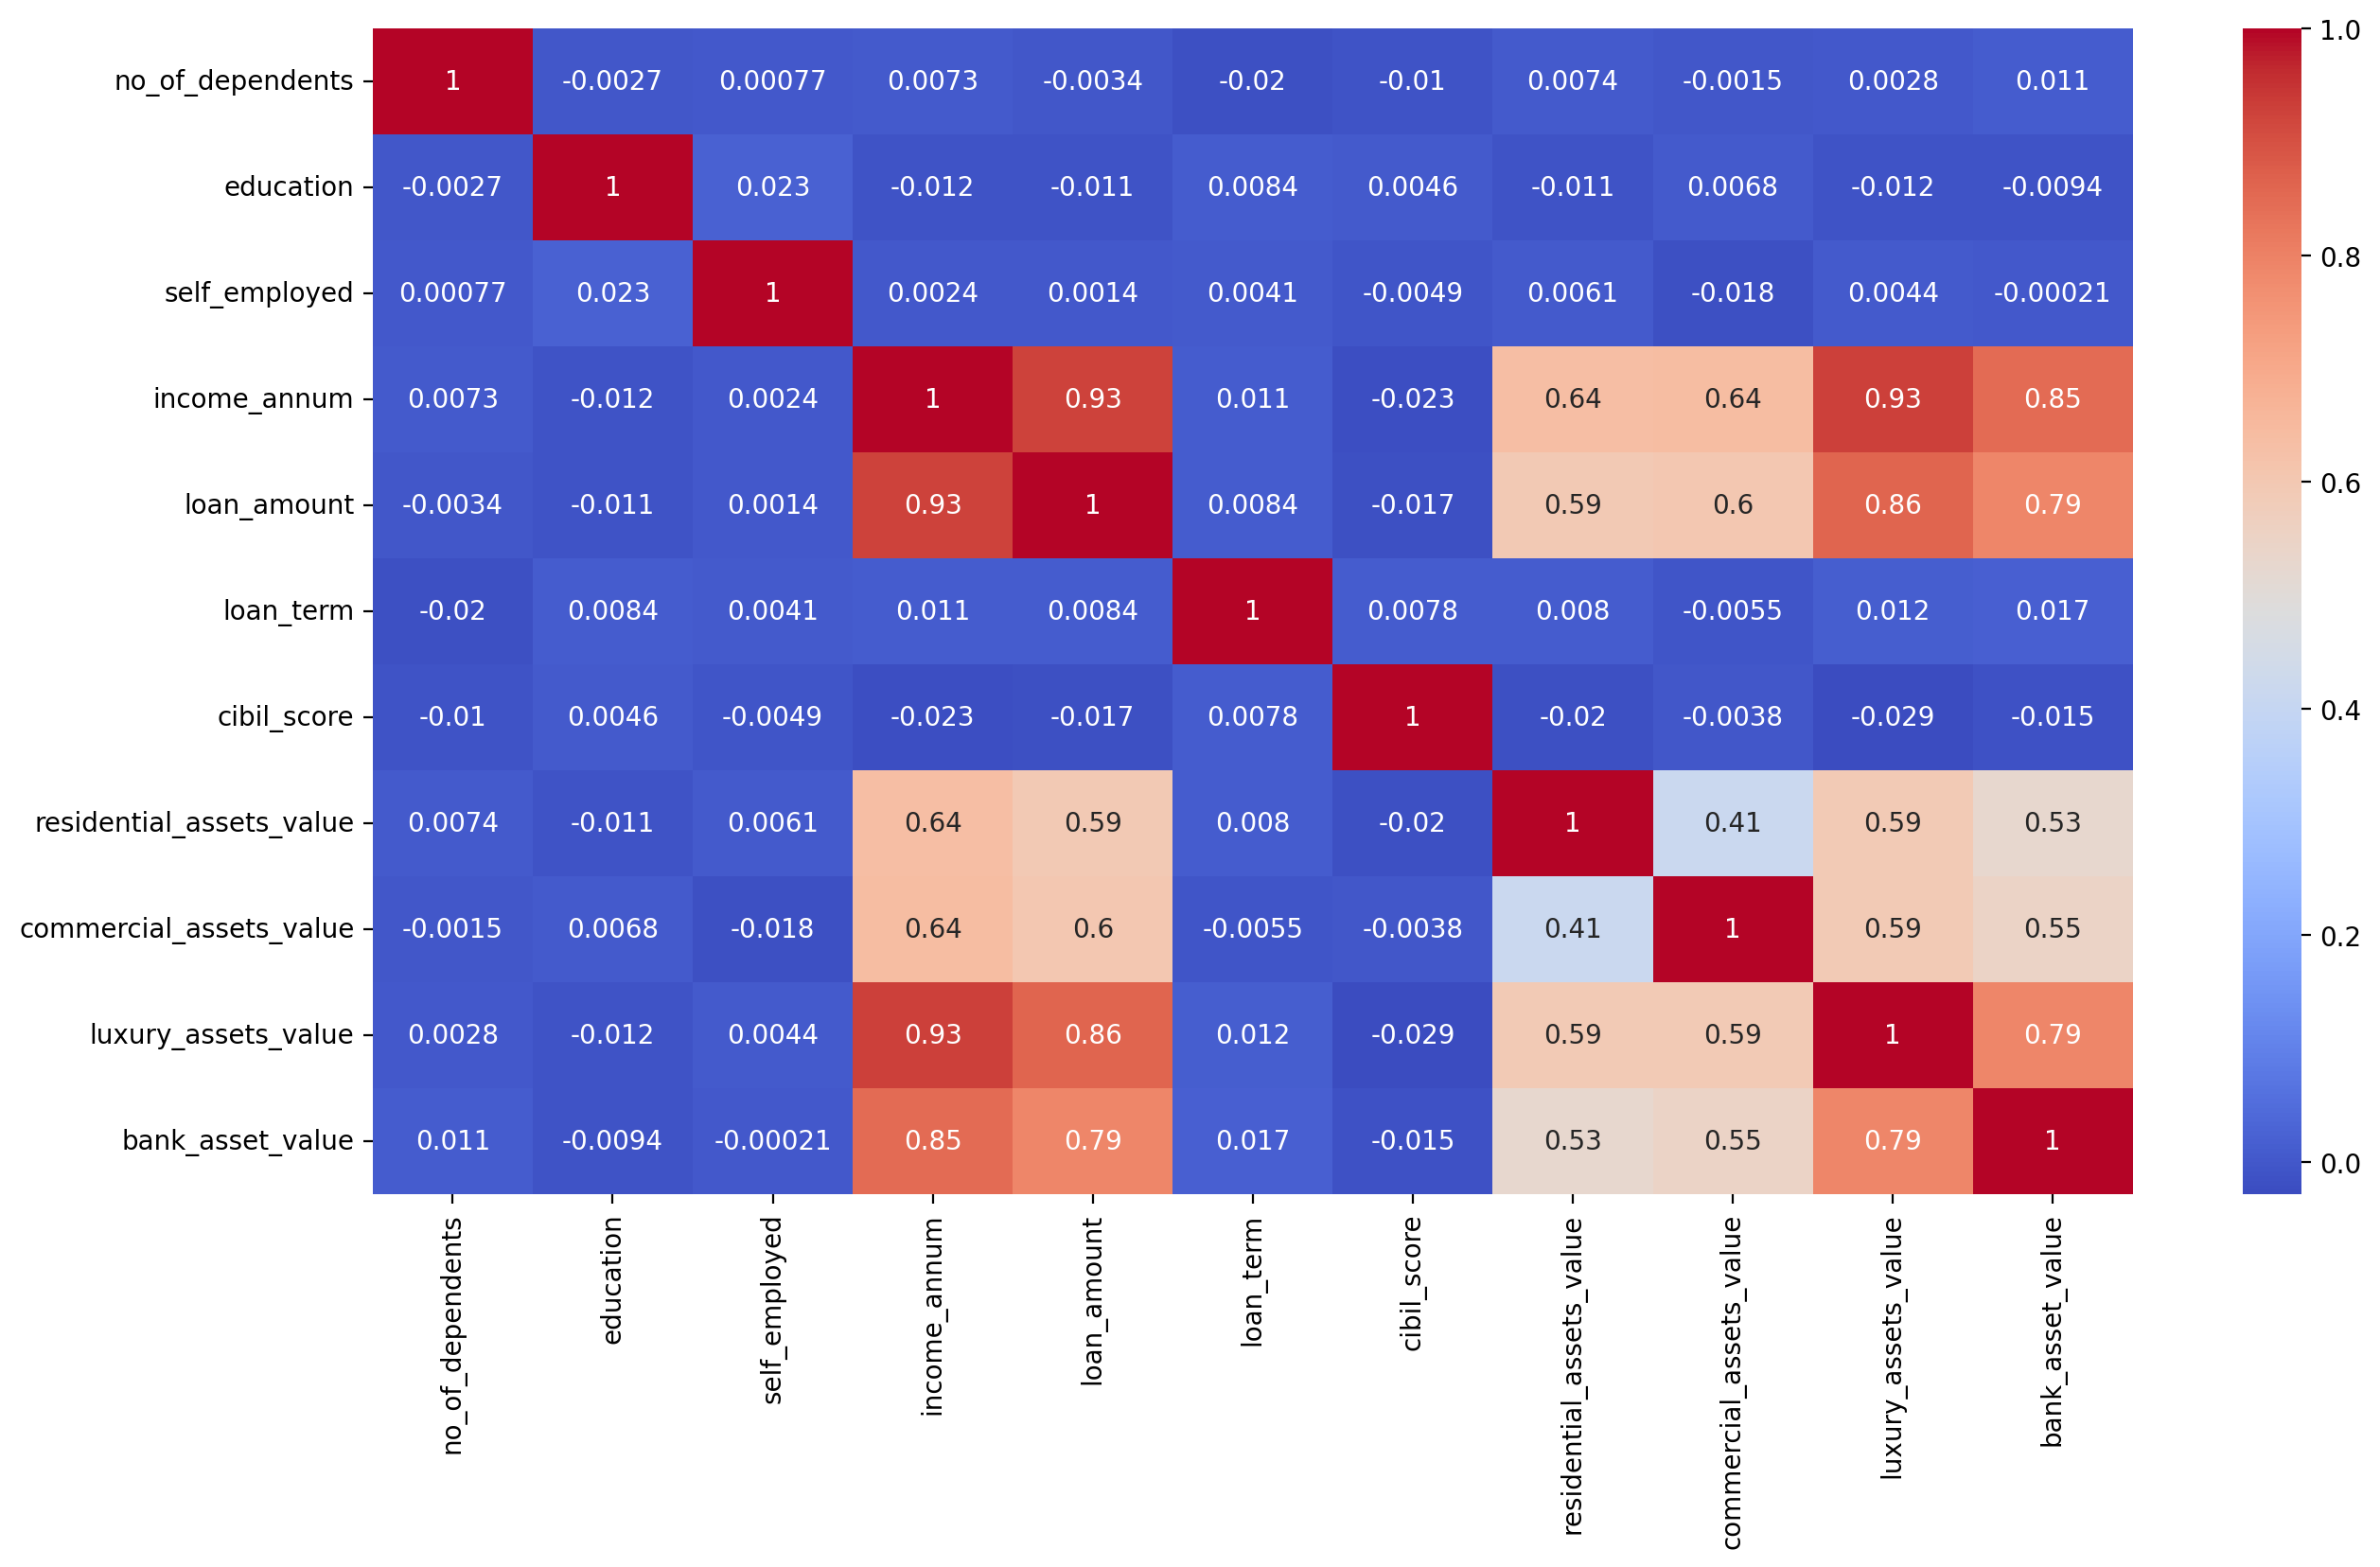

In [144]:
plt.figure(figsize=(15,8),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

### we can see some insights through the heatmap:
####   Annual income and Luxury_assets_value has strong relationship is observed.


In [145]:
df.head()

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   
2                 3          0              0       9100000     29700000   
3                 3          0              0       8200000     30700000   
4                 5          1              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

## Statistical Tests

#### Annova test is used to identify significiant relationship is there or not in below independent variables
####   1.no_of_dependents
####   2.education
####   3.Self_employed

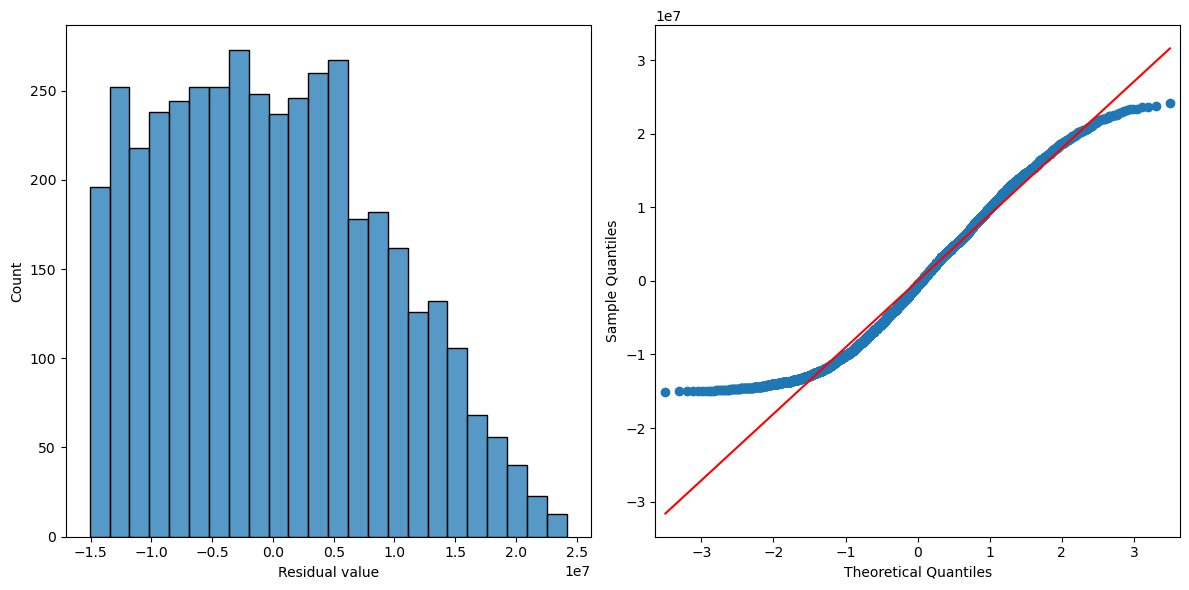

In [146]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame

# You should define the formula directly in the ols function
ols_formula = "loan_amount ~ C(no_of_dependents) + C(education) + C(self_employed)"
ols_data = df[['loan_amount', 'no_of_dependents', 'education', 'self_employed']]

# Create the OLS model
OLS = ols(formula=ols_formula, data=ols_data)
ols_model = OLS.fit()
X_ols=ols_data[['no_of_dependents', 'education', 'self_employed']]
fitted_values = ols_model.predict(X_ols)
residuals=ols_model.resid
fig, axes= plt.subplots(1,2, figsize= (12,6))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual value")
sm.qqplot(residuals,line='s',ax=axes[1])
plt.tight_layout()
plt.show()

## As we see on the left plot, the distribution of the residuals is approximately a right skewed histogram. In the Q-Q plot on the right, there is a straight diagonal line going from the bottom left to the upper right of the Q-Q plot, and the blue markers in the Q-Q plot are relatively close to the red diagonal line and not deviating significantly, it suggests that the data is approximately normally distributed


# Homoscedasticity

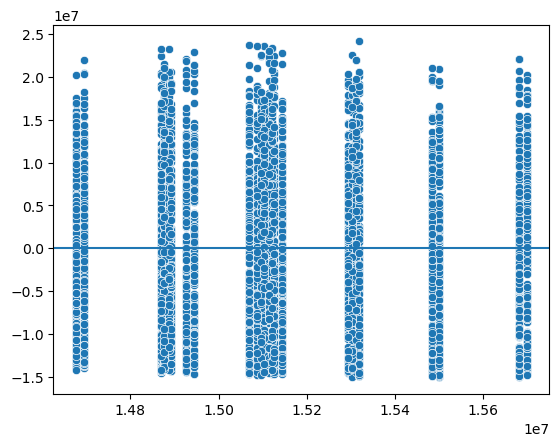

In [147]:
fig=sns.scatterplot(x=fitted_values,y=residuals)
fig.axhline(0)
plt.show()

## Data points seem to be scattered randomly across the line where residuals equal 0, the assumption is likely met.


In [148]:
annova = ols(formula=ols_formula, data=ols_data).fit()
annova_summary = sm.stats.anova_lm(annova, typ= 2)
print(annova_summary)

                           sum_sq      df         F    PR(>F)
C(no_of_dependents)  2.747923e+14     5.0  0.671513  0.645062
C(education)         4.195183e+13     1.0  0.512591  0.474059
C(self_employed)     3.389126e+11     1.0  0.004141  0.948694
Residual             3.487321e+17  4261.0       NaN       NaN


### In all three cases, the p-values are above the common threshold of 0.05, suggesting that these categorical variables are not significantly associated with the loan amount based on the ANOVA tests.

# Split the data into target variable and independent variable

In [149]:
df['loan_status']=df['loan_status'].astype('category')
df['loan_status']=df['loan_status'].cat.codes


In [150]:
x =df.iloc[:,0:-1]
y =df['loan_status']

In [151]:
x.head(1)

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   

   luxury_assets_value  bank_asset_value  
0             22700000           8000000

In [152]:
x.head(5)

no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   
2                 3          0              0       9100000     29700000   
3                 3          0              0       8200000     30700000   
4                 5          1              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  
0             22700000           8000000  
1              8800000           3300000  
2             33300000          12800000  
3             23300000           7900000  
4             29400000           5000000

## Feature scaling

In [153]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
pd.DataFrame(sc_x)

0         1         2         3         4         5         6   \
0    -0.294102 -0.995559 -1.007288  1.617979  1.633052  0.192617  1.032792   
1    -1.473548  1.004461  0.992765 -0.341750 -0.324414 -0.508091 -1.061051   
2     0.295621 -0.995559 -1.007288  1.439822  1.610933  1.594031 -0.544840   
3     0.295621 -0.995559 -1.007288  1.119139  1.721525 -0.508091 -0.771045   
4     1.475067  1.004461  0.992765  1.689242  1.002681  1.594031 -1.264055   
...        ...       ...       ...       ...       ...       ...       ...   
4264  1.475067 -0.995559  0.992765 -1.446324 -1.419268  0.192617 -1.641063   
4265 -1.473548  1.004461  0.992765 -0.626801 -0.423946  1.594031 -0.237434   
4266 -0.294102  1.004461 -1.007288  0.513405  0.969504  1.243677 -0.829046   
4267 -0.883825  1.004461 -1.007288 -0.341750 -0.258059 -0.508091  1.044393   
4268 -0.883825 -0.995559 -1.007288  1.475453  1.610933 -0.157737  0.040972   

            7         8         9         10  
0    -0.780058  2.877289  0.832028  0.930304  
1    -0.733924 -0.631921 -0.694993 -0.515936  
2    -0.057300 -0.107818  1.996520  2.407316  
3     1.649637 -0.381263  0.897943  0.899533  
4     0.757724  0.735304  1.568075  0.007172  
...        ...       ...       ...       ...  
4264 -0.718546 -1.019301 -1.299210 -1.285213  
4265 -0.503257 -0.472412 -0.453306 -0.946732  
4266 -0.964591  1.692361  0.326683  0.714907  
4267  0.111856 -0.973727 -0.112748  0.253341  
4268  1.588126  1.555638  2.260178  2.161148  

[4269 rows x 11 columns]

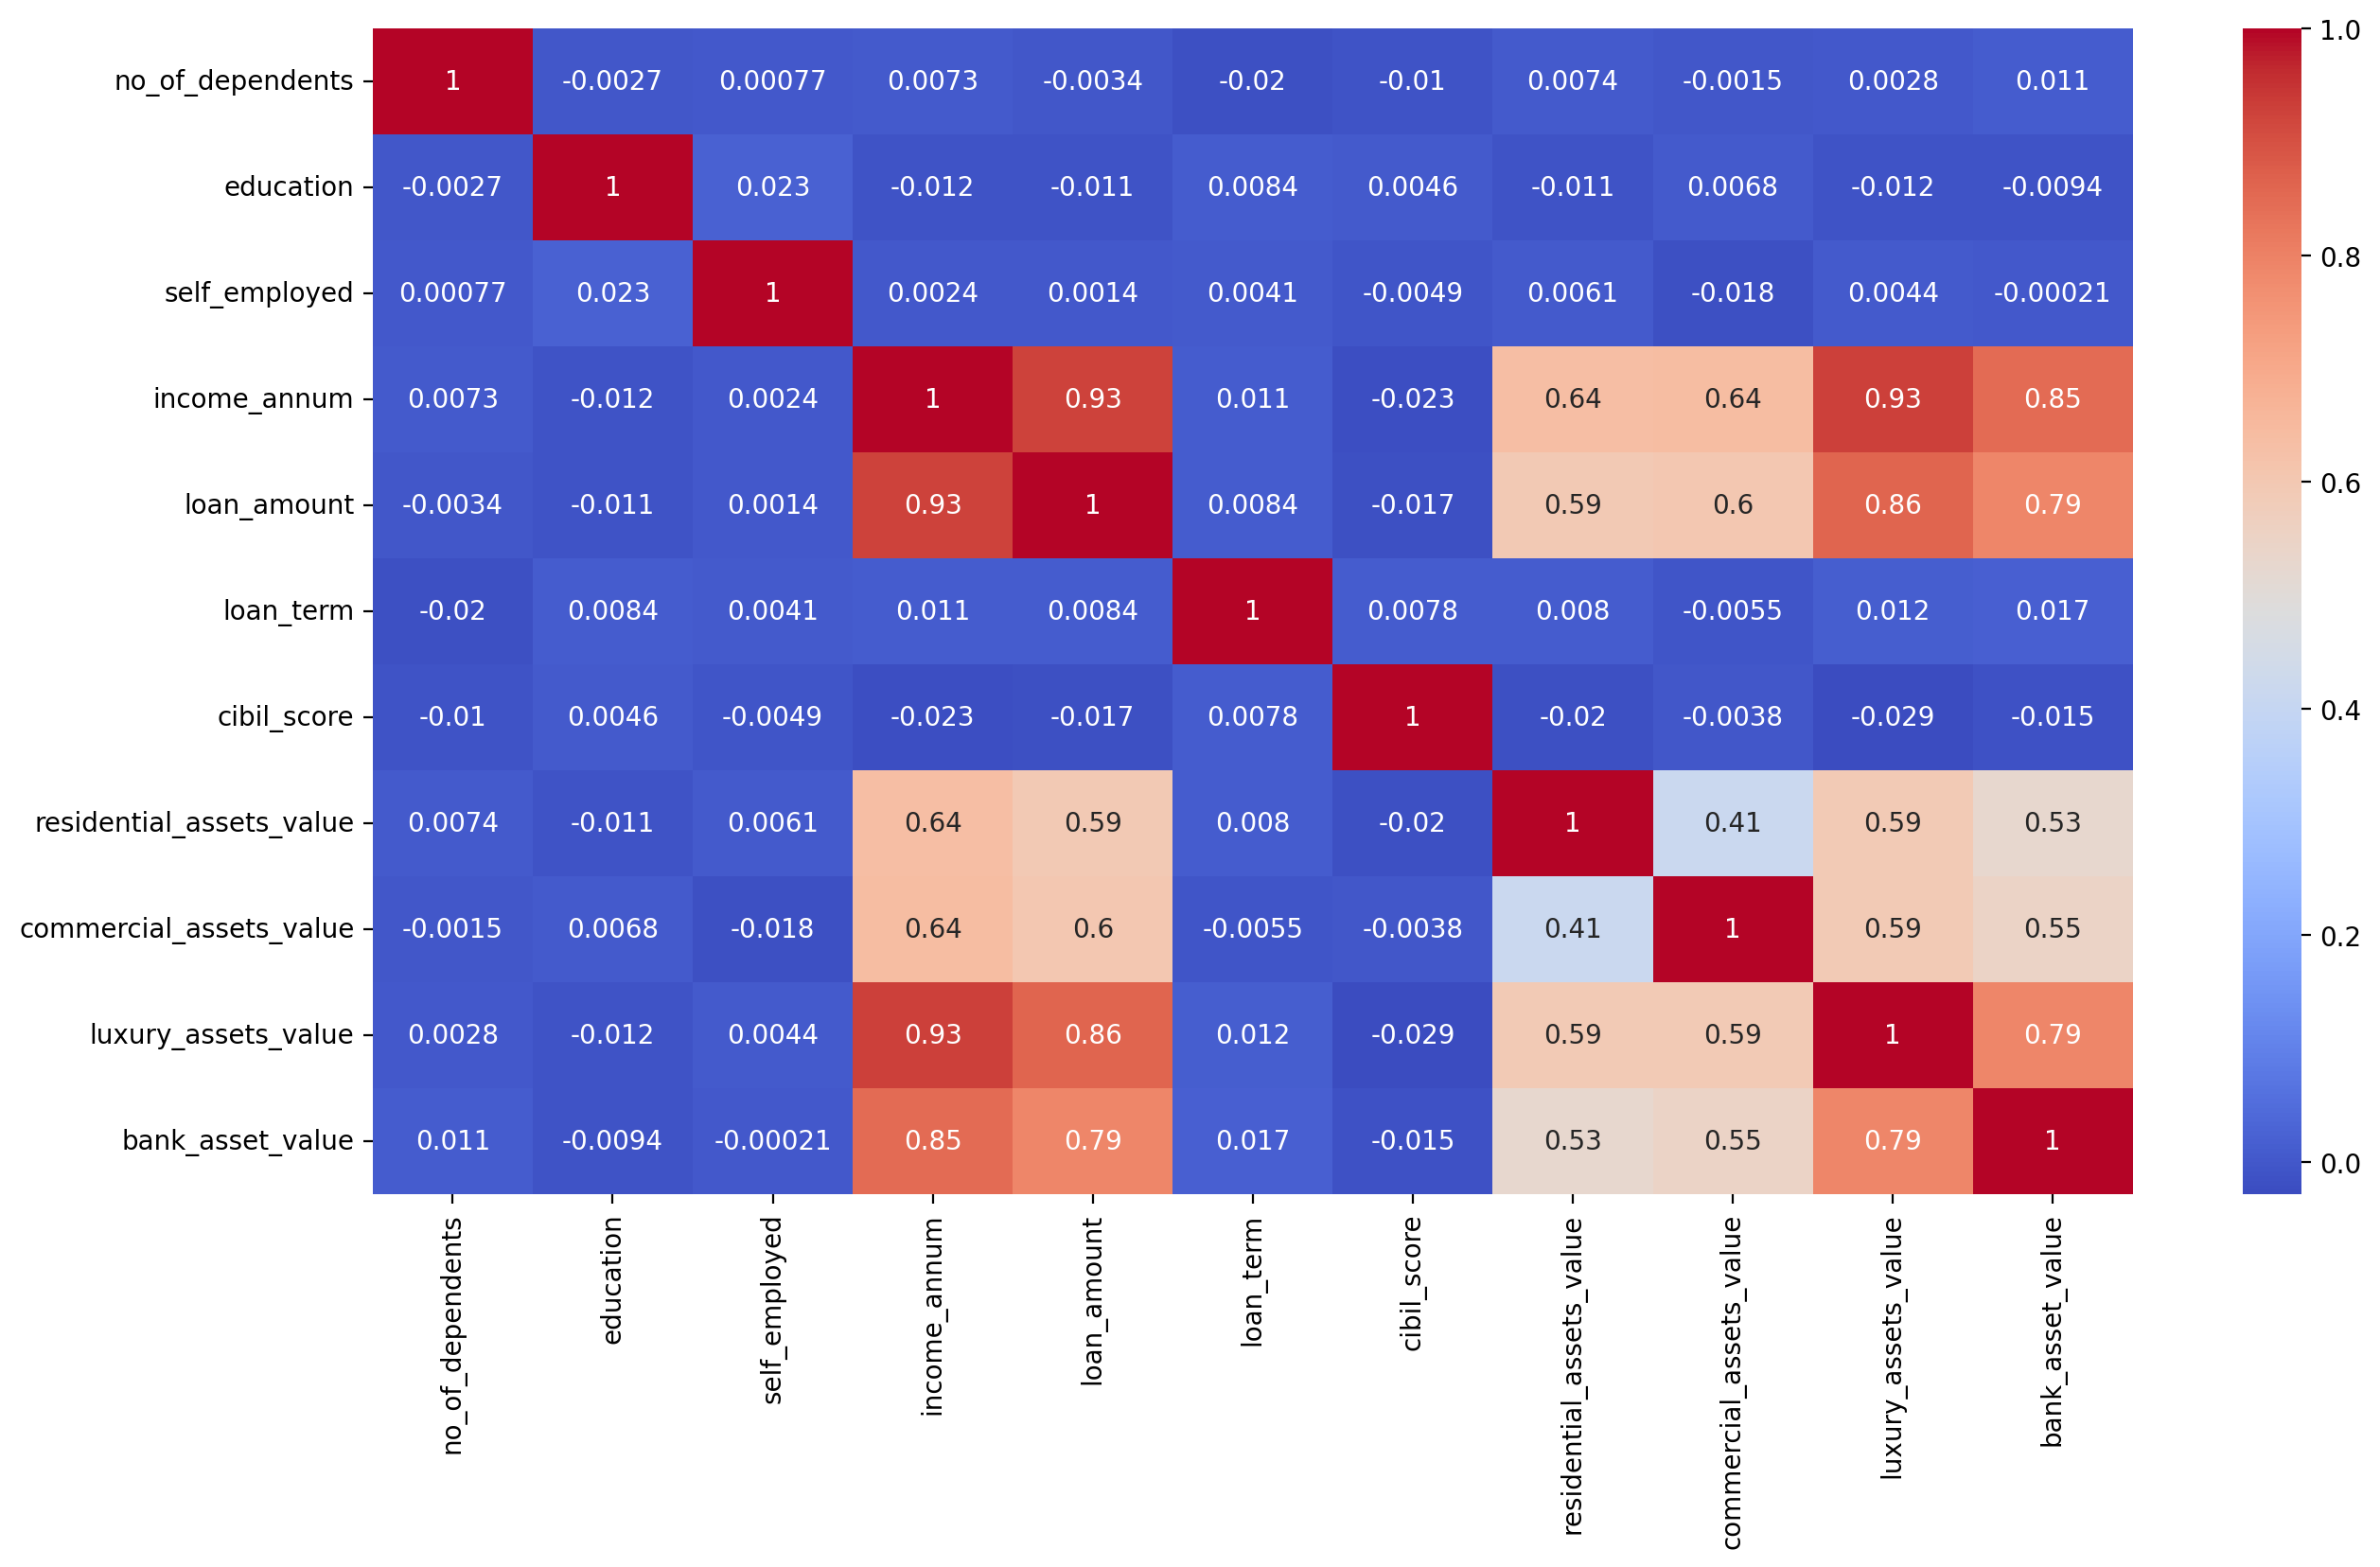

In [154]:
plt.figure(figsize=(15,8),dpi=200)
sns.heatmap(m.corr(),annot=True,cmap='coolwarm')
plt.show()

## Split the data into training and test for building the model and for prediction

In [155]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(3201, 11) (1068, 11) (3201,) (1068,)


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## Logistic Regression

In [157]:
logistic = LogisticRegression()
Ir=logistic.fit(x_train,y_train)
y_pred_Ir = logistic.predict(x_test)
accuracy_Ir=accuracy_score(y_test,y_pred_Ir)

## Decision Tree

In [180]:
dtree = DecisionTreeClassifier()
dt=dtree.fit(x_train,y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt=accuracy_score(y_test,y_pred_dt)

## RandomForest

In [181]:
rfmodel =RandomForestClassifier()
rf=rfmodel.fit(x_train,y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)

## BaggingClassifier

In [182]:
bagg =BaggingClassifier()
bg=bagg.fit(x_train,y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg=accuracy_score(y_test,y_pred_bg)

## AdaBoostClassifier

In [183]:
ada =AdaBoostClassifier()
ad=ada.fit(x_train,y_train)
y_pred_ad = ada.predict(x_test)
accuracy_ad=accuracy_score(y_test,y_pred_ad)

## GradientBoostingClassifier

In [184]:
gdb= GradientBoostingClassifier()
gd=gdb.fit(x_train,y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd=accuracy_score(y_test,y_pred_gd)

## XGBClassifier = RF + GDBoosting - lambda - regularisation, gamma - autoprunning, eta - learning optimization rate

In [185]:
xgb= GradientBoostingClassifier()
xg=xgb.fit(x_train,y_train)
y_pred_xg = gdb.predict(x_test)
accuracy_xg=accuracy_score(y_test,y_pred_xg)

## SVM

In [186]:
svc = SVC()
sv=svc.fit(x_train,y_train)
y_pred_sv = svc.predict(x_test)
accuracy_sv=accuracy_score(y_test,y_pred_sv)

## KNN

In [193]:
knn=KNeighborsClassifier()
kn=knn.fit(x_train,y_train)
y_pred_kn=knn.predict(x_test)
accuracy_knn=accuracy_score(y_test,y_pred_Ir)

# GaussianNB

In [189]:
naive_gb = GaussianNB()
ngb = naive_gb.fit(x_train, y_train)
y_pred_ngb = naive_gb.predict(x_test)
accuracy_ngb = accuracy_score(y_test, y_pred_ngb)

##  BernoulliNB

In [190]:
naive_bn = BernoulliNB()
nbr = naive_bn.fit(x_train, y_train)
y_pred_nbr = naive_bn.predict(x_test)
accuracy_nbr = accuracy_score(y_test, y_pred_nbr)

In [168]:
from sklearn.ensemble import VotingClassifier

In [198]:
evc = VotingClassifier(
    estimators=
       [('Ir', Ir),
        ('dt', dt),
        ('rf', rf),
        ('bg', bg),
        ('ad', ad),
        ('gd', gd),
        ('xg', xg),
        ('sv', sv),
        ('kn', kn),
        ('ngb', ngb),
        ('nbr', nbr),  ],voting='hard')
model_evc=evc.fit(x_train,y_train)
pred_evc=evc.predict(x_test)
accuracy_evc=accuracy_score(y_test,pred_evc)

              Method Used  Accuracy
0      LogisticRegression  0.978464
1            DecisionTree  0.979401
2            RandomForest  0.983146
3                 Bagging  0.983146
4                Adaboost  0.959738
5        GradientBoosting  0.978464
6                 XGBoost  0.978464
7           SupportVector  0.634831
8       KNearestNeighbors  0.978464
9      NaiveBayesGaussian  0.783708
10  NaiveBayesBernoullies  0.634831
11       VotingClassifier  0.979401
AxesSubplot(0.125,0.11;0.775x0.77)


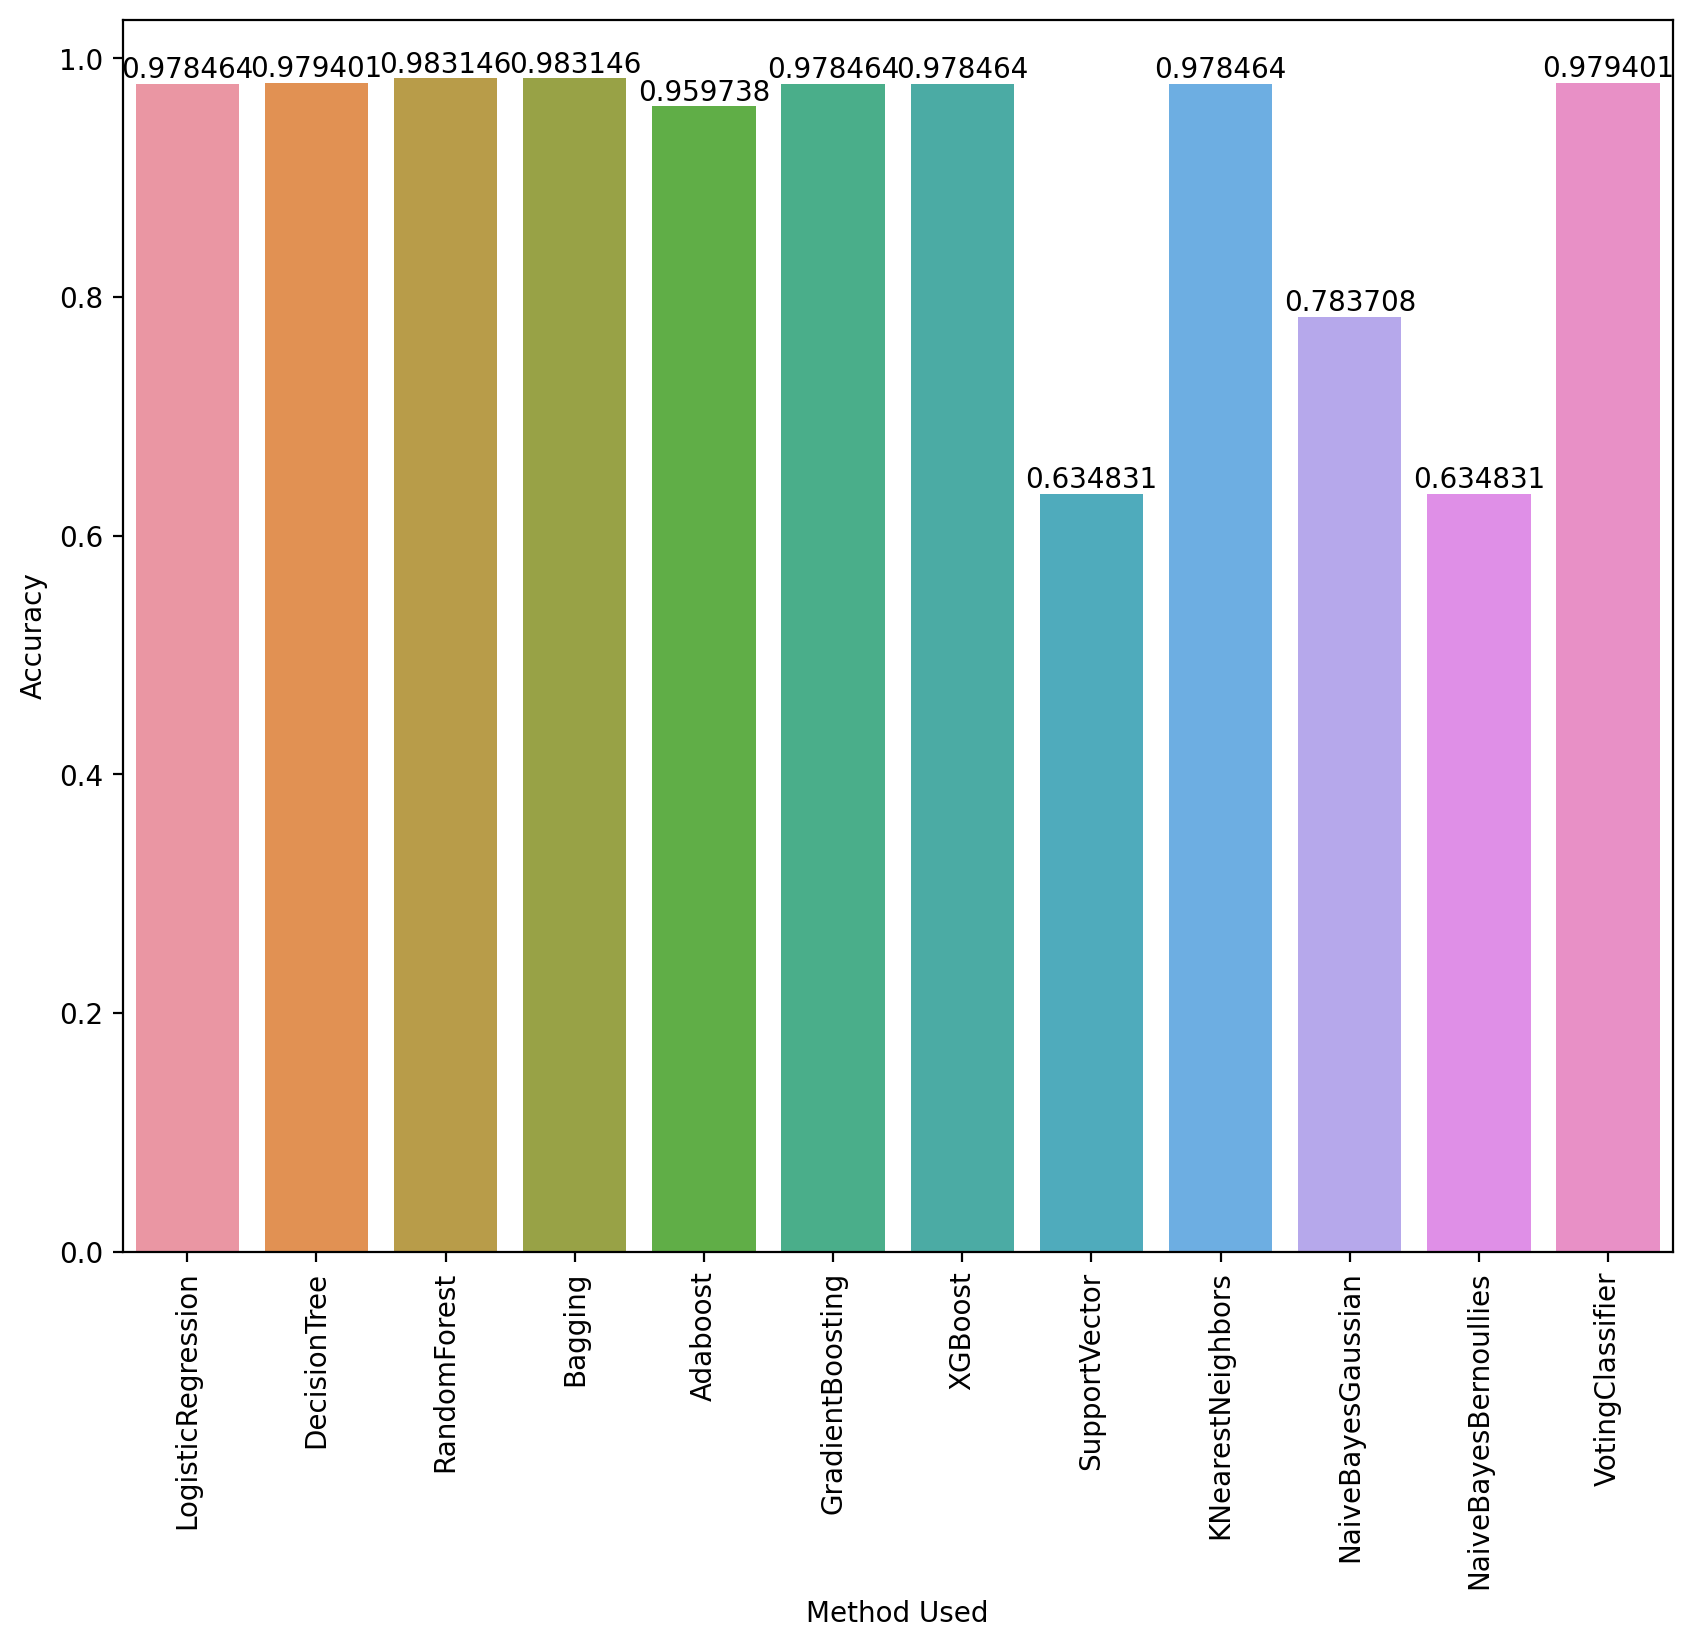

In [201]:
# Creating three lists: list1, list2, and list3 to store model names, accuracy values, and model instances.
list1 = [
    'LogisticRegression',
    'DecisionTree',
    'RandomForest',
    'Bagging',
    'Adaboost',
    'GradientBoosting',
    'XGBoost',
    'SupportVector',
    'KNearestNeighbors',
    'NaiveBayesGaussian',
    'NaiveBayesBernoullies',
    'VotingClassifier']

list2 = [
    accuracy_Ir,
    accuracy_dt,
    accuracy_rf,
    accuracy_bg,
    accuracy_ad,
    accuracy_gd,
    accuracy_xg,
    accuracy_sv,
    accuracy_knn,
    accuracy_ngb,
    accuracy_nbr,
    accuracy_evc]

list3 = [
    logistic,
    dtree,
    rfmodel,
    bagg,
    ada,
    gdb,
    xgb,
    svc,
    knn,
    naive_gb,
    naive_bn,
    evc]

# Creating a DataFrame 'final_accuracy' with columns 'Method Used' and 'Accuracy'
final_accuracy = pd.DataFrame({
    'Method Used': list1,
    "Accuracy": list2})

# Printing the DataFrame
print(final_accuracy)

# Creating a bar plot using Seaborn
plt.figure(figsize=(10,8),dpi=200)
charts = sns.barplot(
    x="Method Used",
    y='Accuracy',
    data=final_accuracy)
for i in charts.containers:
    charts.bar_label(i)

# Rotating x-axis labels for better readability
charts.set_xticklabels(
    charts.get_xticklabels(),
    rotation=90)

# Displaying the bar chart
print(charts)


In [202]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(dtree, x_train, y_train, cv=15)
test_accuracy = cross_val_score(dtree, x_test, y_test, cv=15)
print(training_accuracy[9])
print(test_accuracy[7])


0.9671361502347418
0.9436619718309859


In [203]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=15)
test_accuracy = cross_val_score(dtree, x_test, y_test, cv=15)
print(training_accuracy[9])
print(test_accuracy[7])

0.9859154929577465
0.9436619718309859


In [214]:
print("Logistic Regression Report:")
cr=classification_report(y_test,y_pred_Ir)
print(cr)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       678
           1       0.97      0.97      0.97       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [215]:
print("Decision Trees Classification Report:")
cr=classification_report(y_test,y_pred_dt)
print(cr)

Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       678
           1       0.98      0.97      0.97       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [216]:
print("Random Forest Classification Report:")
cr=classification_report(y_test,y_pred_rf)
print(cr)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       678
           1       0.98      0.98      0.98       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [218]:
print("Gradient Boosting Classification Report:")
cr=classification_report(y_test,y_pred_gd)
print(cr)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       678
           1       0.97      0.97      0.97       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



In [219]:
print("XGboost classification Report:")
cr=classification_report(y_test,y_pred_xg)
print(cr)

XGboost classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       678
           1       0.97      0.97      0.97       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



## In summary The Gradient Boosting, decision trees and random forest models also demonstrated strong performance, while the logistic regression and support vector machines models achieved good but slightly lower accuracy and classification metrics.